<a href="https://colab.research.google.com/github/Zach-Seymour/FDSFE_ZSeymour/blob/main/HW5/Copy_of_Multiple_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Multiple Linear Regression**

---

###Data

The data used in this assignment contains a cleaned and curated version of the market real estate valuations collected from Sindian Dist., New Taipei City, Taiwan, by Prof. I-Cheng Yeh, Department of Civil Engineering, Tamkang University, Taiwan.

The features in the data are the following:

* ```transaction_date```: the transaction date (for example, 2013.250=2013 March, 2013.500=2013 June, etc.)
* ```house_age```: the house age (unit: year)
* ```distance_nearest_MRT_station```: the distance to the nearest MRT station (unit: meter)
* ```convenience_stores```: the number of convenience stores in the living circle on foot (integer)

The target is:
* ```house_price_unit_area```house price of unit area (10000 New Taiwan Dollar/Ping, where Ping is a local unit, 1 Ping = 3.3 meter squared)

---

## HW instructions:

Similar to what was done in class, your task is to do the following:
1.   create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

2.   create a multiple regression model that utilizes all features in the dataset to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

--

In [1]:
import pandas as pd
import numpy as np
from sklearn.preprocessing import StandardScaler
import statsmodels.formula.api as smf
import seaborn as sns

Read the data file from the class repo which can be found in the folder "data" and is called "Real_estate.csv"

In [2]:
df = pd.read_csv('https://raw.githubusercontent.com/fedhere/FDSFE_FBianco/main/data/Real_estate.csv')
df.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area
0,2012.917,32.0,84.87882,10,37.9
1,2012.917,19.5,306.59470,9,42.2
2,2013.583,13.3,561.98450,5,47.3
3,2013.500,13.3,561.98450,5,54.8
4,2012.833,5.0,390.56840,5,43.1


## Task 1: simple linear regression

create a simple regression model that utilizes only one feature: the log10 of ```distance_nearest_MRT_station``` to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient (slope) of the line.

---


Calculate the log10 of the ```distance_nearest_MRT_station``` column and add it as a new column to the data frame

In [3]:
df['log_dist_MRT'] =  np.log10(df['distance_nearest_MRT_station'])
df.head()

,transaction_date,house_age,distance_nearest_MRT_station,convenience_stores,house_price_unit_area,log_dist_MRT
0,2012.917,32.0,84.87882,10,37.9,1.928799
1,2012.917,19.5,306.59470,9,42.2,2.486565
2,2013.583,13.3,561.98450,5,47.3,2.749724
3,2013.500,13.3,561.98450,5,54.8,2.749724
4,2012.833,5.0,390.56840,5,43.1,2.591697


Standardize your feature and target data (setting their mean to 0 and standard deviation to 1)

In [4]:
features = df[['log_dist_MRT','house_price_unit_area']].copy()

scaler = StandardScaler()
features = scaler.fit_transform(features)
features = pd.DataFrame(features)

features.columns = ['log_dist_MRT','house_price_unit_area']

In [5]:
features.describe().round(3)

,log_dist_MRT,house_price_unit_area
count,414.000,414.000
mean,-0.000,0.000
std,1.001,1.001
min,-2.897,-2.235
25%,-0.648,-0.756
50%,-0.172,0.035
75%,0.796,0.634
max,2.133,5.851


Using the code library of your choice, fit a linear regression model to the data

In [6]:
mod = smf.ols(formula='house_price_unit_area ~ log_dist_MRT', data=features)
res = mod.fit()
res.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     house_price_unit_area   R-squared:                       0.539
Model:                               OLS   Adj. R-squared:                  0.538
Method:                    Least Squares   F-statistic:                     482.2
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):           2.52e-71
Time:                           17:03:48   Log-Likelihood:                -427.03
No. Observations:                    414   AIC:                             858.1
Df Residuals:                        412   BIC:                             866.1
Df Model:                              1                                         
Covariance Type:               nonrobust                                         
================================================================================
                   coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------
Intercept      1.24e-16      0.033   3.71e-15      1.000      -0.066       0.066
log_dist_MRT    -0.7343      0.033    -21.959      0.000      -0.800      -0.669
==============================================================================
Omnibus:                      178.772   Durbin-Watson:                   2.109
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             1764.720
Skew:                           1.566   Prob(JB):                         0.00
Kurtosis:                      12.617   Cond. No.                         1.00
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print both the $R^2$ and Adjusted-$R^2$ of this model

(+1 bonus point for using the `.format()` method in `print` to show the two values and round them to 3 decimal places)

In [7]:
print("r2 = {:.3f}".format(res.rsquared))
print("adjusted-r2 = {:.3f}".format(res.rsquared_adj))

r2 = 0.539
adjusted-r2 = 0.538


Print the coefficient (slope) of the line

In [8]:
print(f"coefficient = {res.params[1]:.3f}")

coefficient = -0.734


From looking at the coefficient, what can you say about the relationship between the feature (the distance to the nearest MRT station) and the target (the house price/unit area)?

As the log of the distance to the nearest MRT station increases by 1 standard deviation the house price/unit area decreases by .734 standard deviations on average.

Plot the actual vs. model predicted values for the house price/unit area for all log10(distance to MRT station) values in the data

Text(0.5, 1.0, 'Prediction vs Actual House Price/Unit Area')

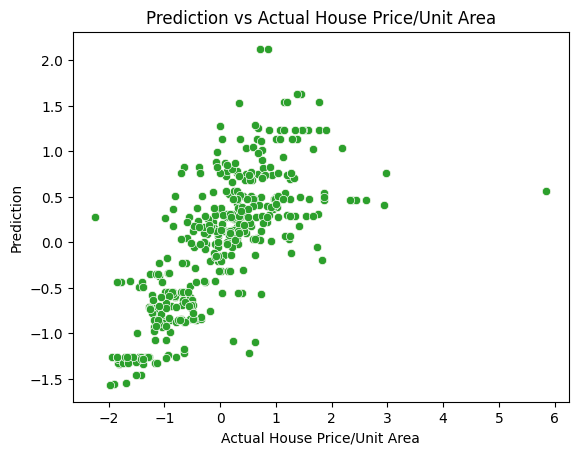

In [9]:
sns.scatterplot(x=features['house_price_unit_area'],y=res.predict()).set_ylabel('Prediction')
sns.scatterplot(x=features['house_price_unit_area'],y=res.predict()).set_xlabel('Actual House Price/Unit Area')
sns.scatterplot(x=features['house_price_unit_area'],y=res.predict()).set_title('Prediction vs Actual House Price/Unit Area')

## Task 2: multiple linear regression (all variables)

create a multiple regression model that utilizes all features to predict the house price/unit area, and find the model's metrics ($R^2$ and Adjusted-$R^2$), as well as the the coeffient for each variable.

---

a univariate linear regression model looks like $y = a_0 + a_1 x$

a multivariate linear regression model with 3 exogenous variable looks like $y = a_0 + a_1 x_1 + a_2 x_2 + a_3 x_3$

The easiest way to implement it is to use `statsmodels.formula.api` which allows to write out the formula you want to use for the regression in more or less plain English. We did it in the linear regression notebook https://github.com/fedhere/FDSFE_FBianco/blob/main/HW5/linear_regression_in_detail.ipynb

The univariate linear model we built in that notebook was

```
import statsmodels.formula.api as smf
     
mod = smf.ols(formula='wspeed ~ population', data=df)
res = mod.fit()
res.summary()
```

y = ax + b => `formula='wspeed ~ population'`

The intercept (b) is implied in the use of `~`
`x` in this case was population and `y` wspeed

Your formula will look like
`formula='y ~ x1 + x2 + x3 + x4'` with the approproate feature names

Make sure all your features and target columns are standardized, and that you are using all the features in the data frame (also make sure to use ```log10(distance_nearest_MRT_station)``` rather than ```distance_nearest_MRT_station``` as a feature)

In [10]:
df.columns

Index(['transaction_date', 'house_age', 'distance_nearest_MRT_station',
       'convenience_stores', 'house_price_unit_area', 'log_dist_MRT'],
      dtype='object')

In [11]:
features_m = df[['transaction_date', 'house_age','convenience_stores', 'house_price_unit_area', 'log_dist_MRT']].copy()
features_m.head()

,transaction_date,house_age,convenience_stores,house_price_unit_area,log_dist_MRT
0,2012.917,32.0,10,37.9,1.928799
1,2012.917,19.5,9,42.2,2.486565
2,2013.583,13.3,5,47.3,2.749724
3,2013.500,13.3,5,54.8,2.749724
4,2012.833,5.0,5,43.1,2.591697


In [12]:
features_m = scaler.fit_transform(features_m)
features_m = pd.DataFrame(features_m)

features_m.columns = ['transaction_date', 'house_age','convenience_stores', 'house_price_unit_area', 'log_dist_MRT']
features_m.head()

,transaction_date,house_age,convenience_stores,house_price_unit_area,log_dist_MRT
0,-0.823683,1.255628,2.007407,-0.005901,-1.744066
1,-0.823683,0.157086,1.667503,0.310507,-0.595682
2,1.541151,-0.387791,0.307885,0.685782,-0.053862
3,1.246435,-0.387791,0.307885,1.237656,-0.053862
4,-1.121951,-1.117223,0.307885,0.376732,-0.379225


In [13]:
features_m.describe().round(3)

,transaction_date,house_age,convenience_stores,house_price_unit_area,log_dist_MRT
count,414.000,414.000,414.000,414.000,414.000
mean,0.000,-0.000,-0.000,0.000,-0.000
std,1.001,1.001,1.001,1.001,1.001
min,-1.711,-1.557,-1.392,-2.235,-2.897
25%,-0.824,-0.763,-1.052,-0.756,-0.648
50%,0.064,-0.142,-0.032,0.035,-0.172
75%,0.952,0.917,0.648,0.634,0.796
max,1.541,2.293,2.007,5.851,2.133


Using the code library of your choice, fit a multiple linear regression model to the data

In [14]:
mod_m = smf.ols(formula='house_price_unit_area ~ log_dist_MRT + convenience_stores + transaction_date + house_age', data=features_m)
res_m = mod_m.fit()
res_m.summary()

<class 'statsmodels.iolib.summary.Summary'>
"""
                              OLS Regression Results                             
=================================================================================
Dep. Variable:     house_price_unit_area   R-squared:                       0.601
Model:                               OLS   Adj. R-squared:                  0.597
Method:                    Least Squares   F-statistic:                     154.2
Date:                   Fri, 20 Oct 2023   Prob (F-statistic):           2.72e-80
Time:                           17:03:49   Log-Likelihood:                -397.12
No. Observations:                    414   AIC:                             804.2
Df Residuals:                        409   BIC:                             824.4
Df Model:                              4                                         
Covariance Type:               nonrobust                                         
======================================================================================
                         coef    std err          t      P>|t|      [0.025      0.975]
--------------------------------------------------------------------------------------
Intercept          -5.645e-14      0.031  -1.81e-12      1.000      -0.061       0.061
log_dist_MRT          -0.6431      0.044    -14.697      0.000      -0.729      -0.557
convenience_stores     0.1375      0.044      3.160      0.002       0.052       0.223
transaction_date       0.1521      0.032      4.822      0.000       0.090       0.214
house_age             -0.1768      0.032     -5.599      0.000      -0.239      -0.115
==============================================================================
Omnibus:                      222.884   Durbin-Watson:                   2.091
Prob(Omnibus):                  0.000   Jarque-Bera (JB):             3251.894
Skew:                           1.942   Prob(JB):                         0.00
Kurtosis:                      16.169   Cond. No.                         2.39
==============================================================================

Notes:
[1] Standard Errors assume that the covariance matrix of the errors is correctly specified.
"""

Print the coefficients of each of the features

In [15]:
params = ['log_dist_MRT','convenience_stores','transaction_date','house_age']
for param in params:
  print(f"coefficient for {param} = {res_m.params[param]:.3f}")

coefficient for log_dist_MRT = -0.643
coefficient for convenience_stores = 0.137
coefficient for transaction_date = 0.152
coefficient for house_age = -0.177


What can you claim about the relative correlation and influence of each feature on the prediction of the target variable?

Both the number of convenient stores and the transaction date have a positive relationship with house price/unit area. This makes sense as more convenient stores would be more useful than remote locations and an assumption that as time goes on house prices go up. Both age and log distance from MRT stations have negative relationships with the target variable. We can thus assume that both being farther away from MRT stations and a house being old would lower the price of a house.

Print the $R^2$ of this model

In [16]:
print("r2 = {:.3f}".format(res_m.rsquared))

r2 = 0.601


Looking only at the $R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

I would say looking strictly at the R squared shows an increase in predictive power of the model, however additional regressors inflates the R squared estimate so it cannot accurately be measured.

Print the Adjusted-$R^2$ of this model

In [17]:
print(f"adjusted-r2 = {res_m.rsquared_adj:.3f}")

adjusted-r2 = 0.597


Looking at both $R^2$ and Ajusted-$R^2$ scores for this model relative to the previous model in Task 1, would you say the model has improved with the addition of the remaining features or not? and Why?

With the additional information of the adjusted R squared we can see thatthe jump in predictive power is not purely an artifact of an increased pool of regressors. The increase is only slightly changed and still significant while looking at the adjusted R squared values.

Plot the actual vs. model predicted values for the house price/unit area for all objects in the data. Is there any visible improvement in the quality of the prediction that you can claim from comparing this plot with the one from Task 2?

Text(0.5, 1.0, 'Prediction vs Actual House Price/Unit Area')

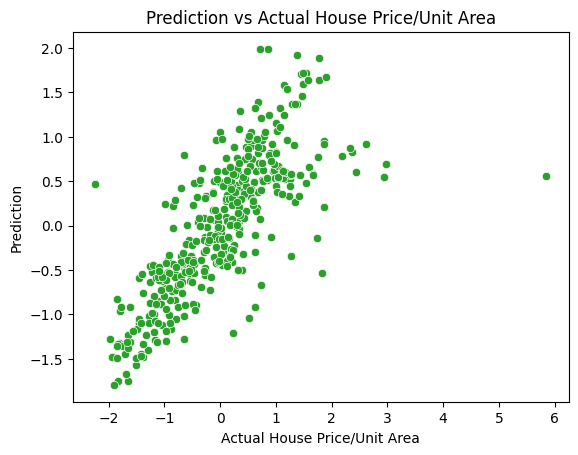

In [18]:
sns.scatterplot(x=features_m['house_price_unit_area'],y=res_m.predict()).set_ylabel('Prediction')
sns.scatterplot(x=features_m['house_price_unit_area'],y=res_m.predict()).set_xlabel('Actual House Price/Unit Area')
sns.scatterplot(x=features_m['house_price_unit_area'],y=res_m.predict()).set_title('Prediction vs Actual House Price/Unit Area')